### Plotting workbook
Plotting workbook to accompany the paper _Carbon Capture and Storage Energy Systems vs. Dispatchable Renewables for Climate Mitigation: A Bio-physical Comparison_ by Sgouridis, Dale, Csala, Chiesa & Bardi

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
plt.style.use('seaborn-darkgrid')
%matplotlib inline
prop = font_manager.FontProperties('Segoe UI')
from sympy import *
init_printing() 

### Eq. 6
Define EROI-CCS function (Eq. 6 in the paper)

In [2]:
var('EROI_CCS EROI f_op');

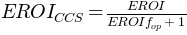

In [3]:
eq6=Eq(EROI_CCS,EROI/(1+f_op*EROI))
eq6

### Eq. 2
Define dispatchable EROI for renewables with storage (Eq. 2 in the paper)

In [4]:
phi = Symbol('phi')
eta = Symbol('eta')
var('EROI_disp EROI ESOI phi eta');

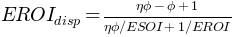

In [5]:
eq2=Eq(EROI_disp,((1-phi)+(eta*phi))/((1/EROI)+(eta*phi/ESOI)))
eq2

### Figure 3 & Table 3
Now we generate the contour lines for _Figure 3_, using the examples from _Table 3_.  
  
We have two tyes of renewable energy plants, _PV_ and _Wind_, each with two cases of EROI, taken from the lower and upper boundaries encountered in studies.  
  
We have assumed a storage technology mixes taken from _Table 1_ of  [Barnhart et al 2013](http://pubs.rsc.org/en/content/articlehtml/2013/ee/c3ee41973h). Here we have the ESOI values reported for 7 energy storage storage technologies, 5 types of electrochemical storage (Batteries), Compressed air (CAES) and pumped hydro (PHS).

We have considered diffrent energy storage technology mixes for our PV and Wind examples. For PV, we have taken an equal mix of all 5 electrochemical storage technologies, without CAES or PHS (resulting in the pv share vector of `[0.2,0.2,0.2,0.2,0.2,0,0]`). For Wind, we have considered 50% battery storage (as an equal 10% from each technology), and 25-25% of CAES and PHS, resulting in the wind share vector of `[0.1,0.1,0.1,0.1,0.1,0.25,0.25]`).

In [6]:
etas=[0.90,0.75,0.90,0.75,0.60,0.70,0.85] #from (Barnhart et al 2013)
S=[32,20,5,10,9,797,704]  #from (Barnhart et al 2013)
shr0=[0.2,0.2,0.2,0.2,0.2,0,0] #assumed shares for considered PV exmaples in this paper
shr1=[0.1,0.1,0.1,0.1,0.1,0.25,0.25]  #assumed shares for considered Wind exmaples in this paper
eta_pv=sum([etas[i]*shr0[i] for i in range(len(etas))]) #resulting composite eta for pv
eta_wind=sum([etas[i]*shr1[i] for i in range(len(etas))]) #resulting composite eta for wind
S_pv=sum([S[i]*shr0[i] for i in range(len(etas))])  #resulting composite S for pv
S_wind=sum([S[i]*shr1[i] for i in range(len(etas))])  #resulting composite S for wind
print 'Composite eta for pv',eta_pv
print 'Composite eta for wind',eta_wind
print 'Composite ESOI for pv',S_pv
print 'Composite ESOI for wind',S_wind

Composite eta for pv 0.78
Composite eta for wind 0.7775
Composite ESOI for pv 15.2
Composite ESOI for wind 382.85


### Construct test cases: _Renewables_

In [22]:
#define pretty output formatter for sympy equation
def format_eq(eq):
    return [solve(eq[i])[0] for i in range(len(eq))]
    #return [float((repr(eq[i])[2:]).split(',')[1].strip()[:-1]) for i in range(len(eq))]

In [23]:
eroi_pv=[10,40] #EROEIe for case [F, G] in Table 3 of the paper, PV plant
eroi_disp_pv=format_eq([eq2.subs([[EROI,i],[phi,0.4],[eta,eta_pv],[ESOI,S_pv]]) for i in eroi_pv])
eroi_wind=[10,33] #EROEIe for case [H, I] in Table 3 of the paper, Wind plant
eroi_disp_wind=format_eq([eq2.subs([[EROI,i],[phi,0.4],[eta,eta_wind],[ESOI,S_wind]]) for i in eroi_wind])

In [25]:
print 'PV [F,G]'
eroi_disp_pv

PV [F,G]


In [26]:
print 'Wind [H,I]'
eroi_disp_wind

Wind [H,I]


### Construct test cases: _Fossils_

In [28]:
eroi_gas=[9.6, 38.5] #EROEIe for case [A, B] in Table 3 of the paper, gas plant
eroi_ccs_gas=format_eq([eq6.subs([[EROI,i],[f_op,0.147]]) for i in eroi_gas])
eroi_coal=[8.9, 22.6] #EROEIe for case [D, E] in Table 3 of the paper, coal plant
eroi_ccs_coal=format_eq([eq6.subs([[EROI,i],[f_op,0.219]]) for i in eroi_coal])

In [29]:
print 'gas [A,B]'
eroi_ccs_gas

gas [A,B]


In [30]:
print 'coal [D,E]'
eroi_ccs_coal

coal [D,E]


### Figure 3
Produce contour lines for multiple $f_{op}$ and $\phi$ levels and place the example plants on the contours. Calculate the $EROI_{CCS}$ and $EROI_{disp}$, respectively, for multiple base $EROI$ values. Likewise we obtain a plot for comparison between dispatchable (i.e. with storage) EROI for renewables and CCS EROI for fossil fuel based power plants.

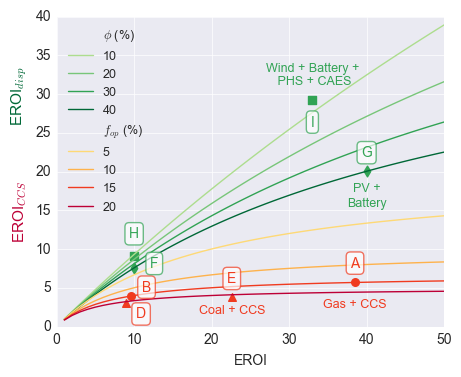

In [31]:
plt.figure(figsize=(5,4))
n=51
erois=range(1,n)

### Renewables contours
colors=['#addd8e',
        '#78c679',
        '#31a354',
        '#006837']
plt.plot(0,0,lw=0,label='${\phi}$ (%)')
#plot EROI_disp contour lines for various EROI values and phi levels
#for eta and S assume a fully battery-based storage (worst case), i.e. the eta_pv and S_pv
pv=1.0 #(pv share in hypothetical renewable technologies)
phis=[0.1,0.2,0.3,0.4] #assumed levels for phi
for r in range(len(phis)):
    phir=phis[r]
    eroi_disps=format_eq([eq2.subs([[EROI,i],[phi,phir],[eta,pv*eta_pv+(1-pv)*eta_wind],[ESOI,pv*S_pv+(1-pv)*S_wind]]) for i in erois])
    plt.plot(erois,eroi_disps,c=colors[r],label=int(phir*100))

plt.xlabel('EROI')
a=plt.gca()
plt.text(-0.07, 0.65, 'EROI$_{disp}$',
        horizontalalignment='right',
        verticalalignment='bottom',rotation=90,#fontproperties=prop,
        size=11,color='#006837',transform=plt.gca().transAxes)
plt.text(-0.07, 0.27, 'EROI$_{CCS}$',
        horizontalalignment='right',
        verticalalignment='bottom',rotation=90,#fontproperties=prop,
        size=11,color='#bd0036',transform=plt.gca().transAxes)

### Fossils contours
colors=['#fed976',
        '#feb24c',
        '#f03b20',
        '#bd0036']
plt.plot(0,0,lw=0,label='$f_{op}$ (%)')
fops=[0.05,0.1,0.15,0.2]  #assumed levels for fop
for r in range(len(fops)):
    fopr=fops[r]
    eroi_ccss=format_eq([eq6.subs([[EROI,i],[f_op,fopr]]) for i in erois])
    plt.plot(erois,eroi_ccss,c=colors[r],label=int(fopr*100))

    
### Table 3 cases
cf="#f03b20"
cr="#31a354"
cg="#aaaaaa"
s=30 #marker size
plt.scatter(eroi_gas,eroi_ccs_gas,s,color=cf,marker='o')
plt.scatter(eroi_coal,eroi_ccs_coal,s,color=cf,marker='^')
plt.scatter(eroi_pv,eroi_disp_pv,s,color=cr,marker='d')
plt.scatter(eroi_wind,eroi_disp_wind,s,color=cr,marker='s')
plt.xlim(0,50)
plt.ylim(0,40)
#[F, G]
plt.text(eroi_pv[1], eroi_disp_pv[1]-1.5, 'PV +\nBattery',
        horizontalalignment='center',
        verticalalignment='top',
        size=9,color=cr)
#[H, I]
plt.text(eroi_wind[1], eroi_disp_wind[1]+1.5, 'Wind + Battery +\n PHS + CAES',
        horizontalalignment='center',
        verticalalignment='bottom',
        size=9,color=cr)
#[A, B]
plt.text(eroi_gas[1], eroi_ccs_gas[1]-2.2, 'Gas + CCS',
        horizontalalignment='center',
        verticalalignment='top',
        size=9,color=cf)
#[D, E]
plt.text(eroi_coal[1], eroi_ccs_coal[1]-1, 'Coal + CCS',
        horizontalalignment='center',
        verticalalignment='top',
        size=9,color=cf)

#Annotate cases
ap=0.7
plt.text(eroi_coal[0]+2, eroi_ccs_coal[0]-0.5, 'D',
        horizontalalignment='center',
        verticalalignment='top',
        size=10,color=cf,
        bbox=dict(facecolor='white', edgecolor=cf,  alpha=ap, boxstyle='round'))
plt.text(eroi_gas[0]+2, eroi_ccs_gas[0]+2, 'B',
        horizontalalignment='center',
        verticalalignment='top',
        size=10,color=cf,
        bbox=dict(facecolor='white', edgecolor=cf,  alpha=ap, boxstyle='round'))
plt.text(eroi_coal[1], eroi_ccs_coal[1]+3.3, 'E',
        horizontalalignment='center',
        verticalalignment='top',
        size=10,color=cf,
        bbox=dict(facecolor='white', edgecolor=cf,  alpha=ap, boxstyle='round'))
plt.text(eroi_gas[1], eroi_ccs_gas[1]+3.3, 'A',
        horizontalalignment='center',
        verticalalignment='top',
        size=10,color=cf,
        bbox=dict(facecolor='white', edgecolor=cf, alpha=ap, boxstyle='round'))

plt.text(eroi_pv[1], eroi_disp_pv[1]+3.3, 'G',
        horizontalalignment='center',
        verticalalignment='top',
        size=10,color=cr,
        bbox=dict(facecolor='white', edgecolor=cr, alpha=ap, boxstyle='round'))
plt.text(eroi_wind[0]+2.6, eroi_disp_wind[0], 'F',
        horizontalalignment='center',
        verticalalignment='top',
        size=10,color=cr,
        bbox=dict(facecolor='white', edgecolor=cr,  alpha=ap, boxstyle='round'))
plt.text(eroi_pv[0], eroi_disp_pv[0]+5.3, 'H',
        horizontalalignment='center',
        verticalalignment='top',
        size=10,color=cr,
        bbox=dict(facecolor='white', edgecolor=cr,  alpha=ap, boxstyle='round'))
plt.text(eroi_wind[1], eroi_disp_wind[1]-2, 'I',
        horizontalalignment='center',
        verticalalignment='top',
        size=10,color=cr,
        bbox=dict(facecolor='white', edgecolor=cr,  alpha=ap, boxstyle='round'))

plt.legend(framealpha=0,loc=2,fontsize=9)
plt.savefig('fig3.png',bbox_inches = 'tight', facecolor='w', pad_inches = 0.1, dpi=200)
plt.show()

### Figure 4
For this figure we are considering various levels of powerplant efficiency, and its effect on the EROI , under various capture ratio assumptions. This is described in Eq. 1 and Eq. 4 in the paper.

Define parameters

Electricity penalty (b) curve from Sanpasternich (2009) Figure 8 [kWh/kg CO2] 

In [33]:
#CCS_op #operating CCS penalty
#CR #capture ratio
var('CCS_op CR');
CCS_op_eq=Eq(CCS_op,25.957**6 - 85.031*CR**5 + \
114.5*CR**4 - 80.385*CR**3 + \
31.47*CR**2 - 6.7725*CR  + 1.1137)
CCS_op_eq

Operational cost of coal fuel cycle over plant lifetime output [kWh]

In [34]:
#PP_op_L #operational cost of coal fuel cycle over plant lifetime
#PP_op #operational cost of coal fuel cycle
#PP_CF #powerplant capacity factor
#PP_L #powerplant lifetime
#eta #powerplant efficiency
var('PP_op_L PP_op PP_CF eta PP_L');
PP_op_L_eq=Eq(PP_op_L,8760*PP_L*PP_CF*PP_op/eta)
PP_op_L_eq

Carbon intensity of electricity [kg CO2/kWh]

In [35]:
#C_CO2 #carbon dioxide content of coal [kg/MJ]
#Elec_CO2 #carbon intensity of electricity [kg CO2/kWh]
var('Elec_CO2 C_CO2');
Elec_CO2_eq=Eq(Elec_CO2,C_CO2*3.6/eta)
Elec_CO2_eq

Energy penalty of CCS [dmnl]

In [36]:
#b #energy penalty of CCS
var('b');
b_eq=Eq(b,CCS_op*Elec_CO2*CR)
b_eq

Emissions

In [37]:
#E #emissions
var('E');
E_eq=Eq(E,CCS_op*(1-CR))
E_eq

Energy cost of constructing CCS plant

In [40]:
#CCS_cons_energy #energy cost of constructing CCS plant
#f_cap #energy cost share of constructing CCS plant
#PP_cons_energy #energy cost of power plant construction [MJ/MW], does not include energy embodied in materials
var('CCS_cons_energy PP_cons_energy f_cap');
CCS_cons_energy_eq=Eq(CCS_cons_energy,f_cap*PP_cons_energy)
CCS_cons_energy_eq

EROIs

Energy cost of constructing CCS plant

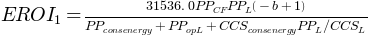

In [45]:
#EROI_1 #EROI where CCS construction energy is a ratio of power plant construction energy [MJ_e/MW/(MJ_p/MW) = dmnl]
#CCS_L #CCS plant lifetime
var('EROI_1 CCS_L');
EROI_1_eq=Eq(EROI_1,8760*PP_L*PP_CF*(1-b)*3.6/\
                    (PP_cons_energy + PP_op_L + CCS_cons_energy*PP_L/CCS_L))
EROI_1_eq

In [42]:
#EROI_1_adj #makes adjustment for electrical output [MJ_p/MJ_p = dmnl]
var('EROI_1_adj');
EROI_1_adj_eq=Eq(EROI_1_adj,EROI_1/0.3)
EROI_1_adj_eq

Energy cost of operating CCS plant

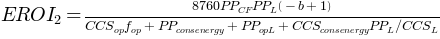

In [46]:
#EROI_2 #where CCS construction energy is a ratio of CCS operation energy [MJ_e/MJ_p = dmnl]
var('EROI_2');
EROI_2_eq=Eq(EROI_2,8760*PP_L*PP_CF*(1-b)/\
                    (PP_cons_energy + PP_op_L + f_op*CCS_op + CCS_cons_energy*PP_L/CCS_L))
EROI_2_eq

In [47]:
#EROI_2_adj #makes adjustment for electrical output [MJ_p/MJ_p = dmnl]
var('EROI_2_adj');
EROI_2_adj_eq=Eq(EROI_2_adj,EROI_1/0.3)
EROI_2_adj_eq

Translation to quantities as per defined in the paper

### Eq. 5

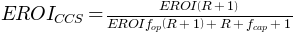

In [48]:
#R #E_op/E_cap
var('R');
eq5=Eq(EROI_CCS,(R+1)*EROI/(R+1+f_cap+f_op*(R+1)*EROI))
eq5

In [51]:
var('E_op E_cap');
R_eq=Eq(R,E_op/E_cap)
R_eq

### Eq. 4

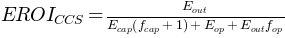

In [52]:
var('E_CCS E_out E_red');
eq4=Eq(EROI_CCS,E_out/((1+f_cap)*E_cap+E_op+f_op*E_out))
eq4

In [53]:
f_op_eq=Eq(f_op,E_red/E_out)
f_op_eq

In [103]:
f_cap_eq=Eq(f_cap,E_CCS/E_cap)
f_cap_eq

### Eq. 3

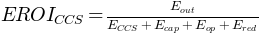

In [92]:
eq3=Eq(EROI_CCS,E_out/(E_cap+E_op+E_red+E_CCS))
eq3

### Eq. 1

In [93]:
var('E_in');
eq1=Eq(EROI,E_out/E_in)
eq1

In [94]:
E_in_eq=Eq(E_in,E_cap+E_op)
E_in_eq

In [95]:
solve(E_in_eq,E_in)[0]

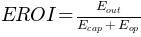

In [96]:
eq1.subs([[E_in,solve(E_in_eq,E_in)[0]]])

### Verification
Bactkrack to Eq. 3 from Eq. 5

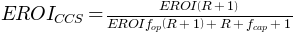

In [97]:
eq5

Get back Eq. 4 from Eq. 5

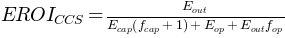

In [98]:
eq5.subs([[R,solve(R_eq,R)[0]],\
          [EROI,solve(eq1.subs([[E_in,solve(E_in_eq,E_in)[0]]]),EROI)[0]]]).simplify()

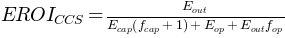

In [99]:
eq4

Get back Eq. 3 from Eq. 4

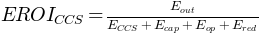

In [104]:
eq4.subs([[f_op,solve(f_op_eq,f_op)[0]],\
         [f_cap,solve(f_cap_eq,f_cap)[0]]]).simplify()

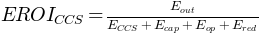

In [105]:
eq3

### Translate
Translate example notation into paper equation notations

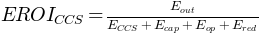

In [108]:
eq3

In [109]:
E_out_eq=Eq(E_out,8760*PP_L*PP_CF*(1-b))
E_out_eq

In [115]:
E_out_eq.subs([[b,solve(b_eq,b)[0]]])\
        .subs([[CCS_op,solve(CCS_op_eq,CCS_op)[0]]])\
        .subs([[Elec_CO2,solve(Elec_CO2_eq,Elec_CO2)[0]]])

... ?

Construct from bottom up

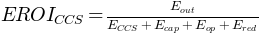

In [125]:
eq3